# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv('b1abb33c4f.csv')

In [3]:
data.shape

(27028, 69)

In [4]:
data.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

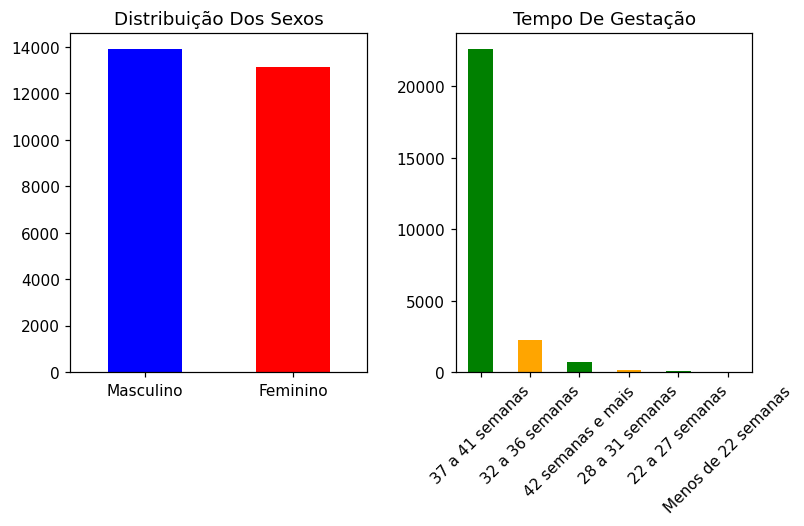

In [5]:
f, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=110)

data.value_counts('SEXO').plot.bar(color=['blue', 'red'], ax=ax[0])
ax[0].set_title('Distribuição Dos Sexos')
ax[0].set_xlabel(None)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)

data.value_counts('GESTACAO').plot.bar(color=['green', 'orange'], ax=ax[1])
ax[1].set_title('Tempo De Gestação')
ax[1].set_xlabel(None)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

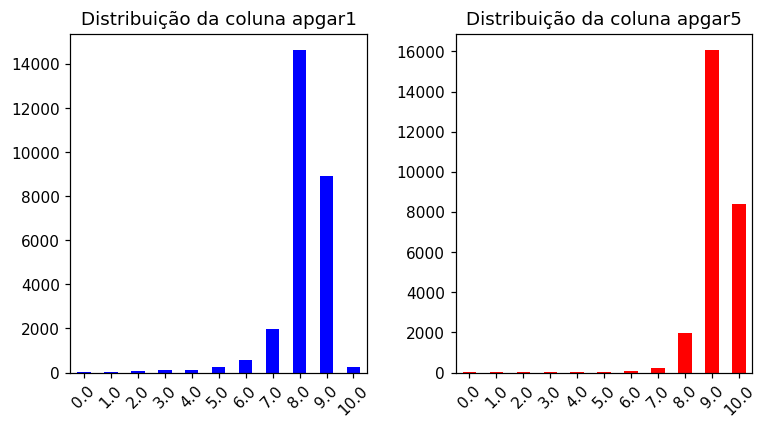

In [6]:
f, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=110)
data.value_counts('APGAR1').sort_index().plot.bar(color=('b'), ax=ax[0])

ax[0].set_title('Distribuição da coluna apgar1')
ax[0].set_xlabel(None)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)


data.value_counts('APGAR5').sort_index().plot.bar(color='r', ax=ax[1])
ax[1].set_title('Distribuição da coluna apgar5')
ax[1].set_xlabel(None)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

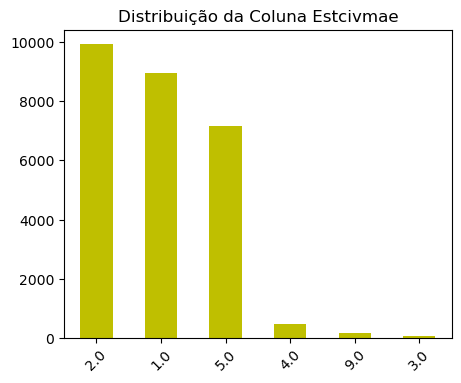

In [7]:
f, ax = plt.subplots(1, 1, figsize=(5,4))
data.value_counts('ESTCIVMAE').plot.bar(color=('y'), ax=ax)

ax.set_title('Distribuição da Coluna Estcivmae')
ax.set_xlabel(None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [8]:
media_ap = data.groupby(['CONSULTAS']).agg({'APGAR5': np.mean}).reset_index()

In [9]:
media_ap

,CONSULTAS,APGAR5
0,1,8.981481
1,2,9.057395
2,3,9.154440
3,4,9.207188
4,9,8.860000


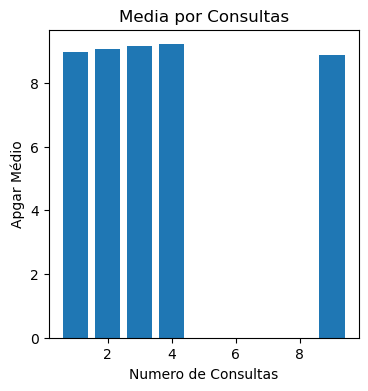

In [10]:
f, ax = plt.subplots(1, 1, figsize=(4, 4)) 
ax.bar(media_ap['CONSULTAS'].sort_values(), media_ap['APGAR5'])

ax.set_title('Media por Consultas')
ax.set_xlabel('Numero de Consultas')
ax.set_ylabel('Apgar Médio')

plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

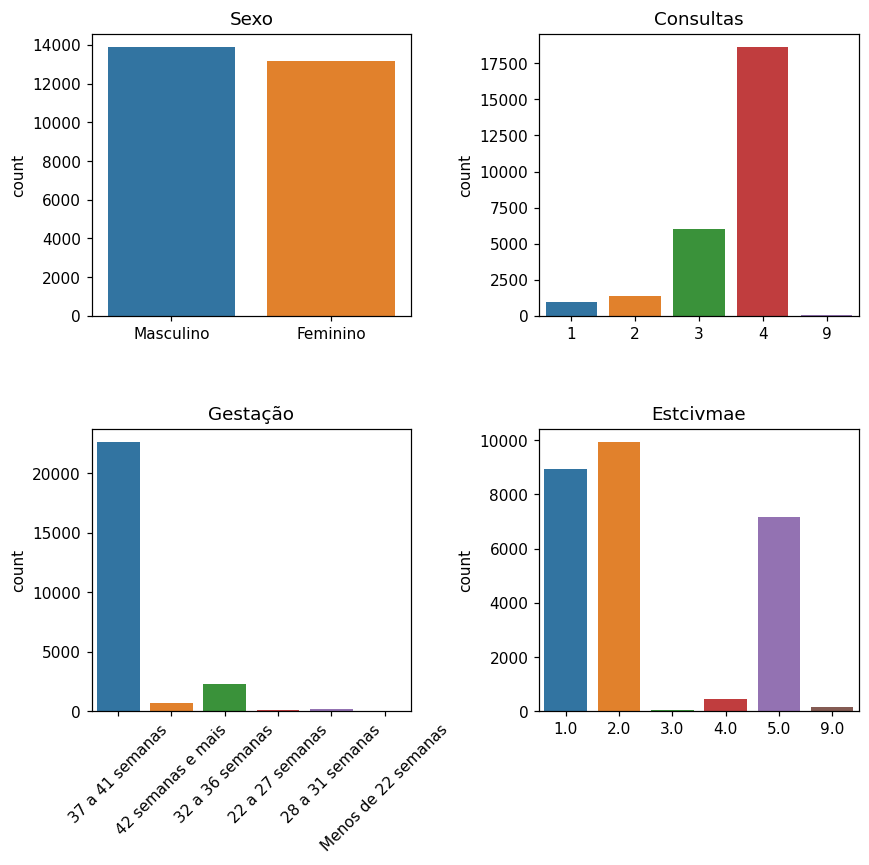

In [12]:
f, ax = plt.subplots(2, 2, figsize=(9, 8), dpi=110)

sns.countplot(ax = ax[0, 0], x='SEXO', data=data)
sns.countplot(ax = ax[0, 1], x='CONSULTAS', data=data)
sns.countplot(ax = ax[1, 0], x='GESTACAO', data=data)
sns.countplot(ax = ax[1, 1], x='ESTCIVMAE', data=data)

ax[0, 0].set_title('Sexo')
ax[0, 0].set_xlabel(None)

ax[0, 1].set_title('Consultas')
ax[0, 1].set_xlabel(None)

ax[1, 0].set_title('Gestação')
ax[1, 0].set_xlabel(None)
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)

ax[1, 1].set_title('Estcivmae')
ax[1, 1].set_xlabel(None)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()